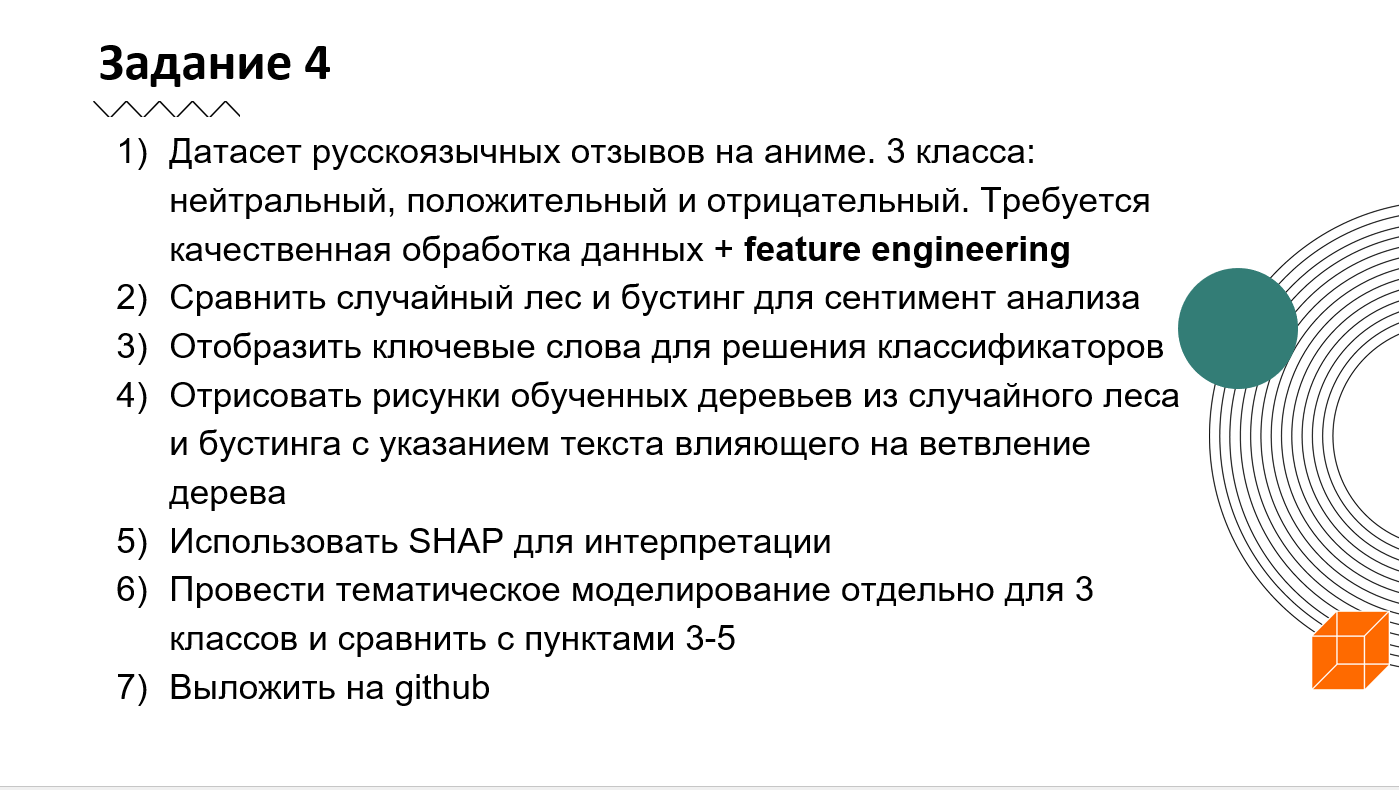

In [1]:
from google.colab import files

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Загрузим датасеты и будем с ними работать

In [3]:
uploaded = files.upload()

Saving dataset1.xlsx to dataset1.xlsx
Saving dataset2.xlsx to dataset2.xlsx
Saving dataset3.xlsx to dataset3.xlsx
Saving dataset4.xlsx to dataset4.xlsx


Сделаем конкат датасетов и будем рассматривать их как один


In [4]:
df1 = pd.read_excel("/content/dataset1.xlsx")
df2 = pd.read_excel("/content/dataset2.xlsx")
df3 = pd.read_excel("/content/dataset3.xlsx")
df4 = pd.read_excel("/content/dataset4.xlsx")

In [5]:
df = pd.concat([df1, df2, df3, df4])

In [6]:
df1.head()

,Anime,Rate,Text
0,Нежный укус / Amagami SS,Нейтральный,"после первой арки несколько разочаровался, ожи..."
1,Легенда о легендарных героях / Densetsu no Yuu...,Положительный,"Концовка какая-то мутная, ничего не понял. Над..."
2,Мобильный воин Гандам: Единорог / Kidou Senshi...,Положительный,"Что тут сказать? Никакого сравнени я с Seed, х..."
3,Невиданный цветок / Ano Hi Mita Hana no Namae ...,Положительный,Только что досмотрел и меня переполняют эмоции...
4,Принцесса-медуза / Kuragehime,Положительный,"И правда не оторваться. Но, по-моему, то, что ..."


In [7]:
df.head()

,Anime,Rate,Text
0,Нежный укус / Amagami SS,Нейтральный,"после первой арки несколько разочаровался, ожи..."
1,Легенда о легендарных героях / Densetsu no Yuu...,Положительный,"Концовка какая-то мутная, ничего не понял. Над..."
2,Мобильный воин Гандам: Единорог / Kidou Senshi...,Положительный,"Что тут сказать? Никакого сравнени я с Seed, х..."
3,Невиданный цветок / Ano Hi Mita Hana no Namae ...,Положительный,Только что досмотрел и меня переполняют эмоции...
4,Принцесса-медуза / Kuragehime,Положительный,"И правда не оторваться. Но, по-моему, то, что ..."


In [8]:
df4.tail()

,Anime,Rate,Text
15423,Пожиратель звёзд / Tunshi Xingkong,Положительный,Я просмотрел 82 серии Пожирателя звёзд (Swallo...
15424,Пожиратель звёзд 2 / Tunshi Xingkong 2nd Season,Положительный,Я был сильно заинтригован аниме Поглощающая Зв...
15425,Повелитель 2 / Overlord II,Нейтральный,докатились. после просмотра этого чуда я добав...
15426,Ангел по соседству / Otonari no Tenshi-sama ni...,Положительный,Вокруг этого произведения собралось достаточно...
15427,Кулинарные скитания в параллельном мире / Tond...,Положительный,Tondemo Skill de Isekai Hourou MeshiКулинарные...


In [9]:
df.tail()

,Anime,Rate,Text
15423,Пожиратель звёзд / Tunshi Xingkong,Положительный,Я просмотрел 82 серии Пожирателя звёзд (Swallo...
15424,Пожиратель звёзд 2 / Tunshi Xingkong 2nd Season,Положительный,Я был сильно заинтригован аниме Поглощающая Зв...
15425,Повелитель 2 / Overlord II,Нейтральный,докатились. после просмотра этого чуда я добав...
15426,Ангел по соседству / Otonari no Tenshi-sama ni...,Положительный,Вокруг этого произведения собралось достаточно...
15427,Кулинарные скитания в параллельном мире / Tond...,Положительный,Tondemo Skill de Isekai Hourou MeshiКулинарные...


In [10]:
df = df.reset_index()
del df["index"]
df.tail()

,Anime,Rate,Text
73211,Пожиратель звёзд / Tunshi Xingkong,Положительный,Я просмотрел 82 серии Пожирателя звёзд (Swallo...
73212,Пожиратель звёзд 2 / Tunshi Xingkong 2nd Season,Положительный,Я был сильно заинтригован аниме Поглощающая Зв...
73213,Повелитель 2 / Overlord II,Нейтральный,докатились. после просмотра этого чуда я добав...
73214,Ангел по соседству / Otonari no Tenshi-sama ni...,Положительный,Вокруг этого произведения собралось достаточно...
73215,Кулинарные скитания в параллельном мире / Tond...,Положительный,Tondemo Skill de Isekai Hourou MeshiКулинарные...


Убедимся, что у нас всего 3 класса

In [11]:
df.Rate.unique()

array(['Нейтральный', 'Положительный', 'Отрицательный'], dtype=object)

Посмотрим, что есть ли дисбаланс классов

In [12]:
 cnt = df['Rate'].value_counts()
 cnt

Rate
Положительный    30073
Нейтральный      25263
Отрицательный    17880
Name: count, dtype: int64

Получается, что отрицательных отзывов в 2 раза меньше, чем положительных

In [13]:
le = LabelEncoder()
df["rate_code"] = le.fit_transform(df['Rate'])
df.rate_code.unique()

array([0, 2, 1])

In [14]:
df

,Anime,Rate,Text,rate_code
0,Нежный укус / Amagami SS,Нейтральный,"после первой арки несколько разочаровался, ожи...",0
1,Легенда о легендарных героях / Densetsu no Yuu...,Положительный,"Концовка какая-то мутная, ничего не понял. Над...",2
2,Мобильный воин Гандам: Единорог / Kidou Senshi...,Положительный,"Что тут сказать? Никакого сравнени я с Seed, х...",2
3,Невиданный цветок / Ano Hi Mita Hana no Namae ...,Положительный,Только что досмотрел и меня переполняют эмоции...,2
4,Принцесса-медуза / Kuragehime,Положительный,"И правда не оторваться. Но, по-моему, то, что ...",2
...,...,...,...,...
73211,Пожиратель звёзд / Tunshi Xingkong,Положительный,Я просмотрел 82 серии Пожирателя звёзд (Swallo...,2
73212,Пожиратель звёзд 2 / Tunshi Xingkong 2nd Season,Положительный,Я был сильно заинтригован аниме Поглощающая Зв...,2
73213,Повелитель 2 / Overlord II,Нейтральный,докатились. после просмотра этого чуда я добав...,0
73214,Ангел по соседству / Otonari no Tenshi-sama ni...,Положительный,Вокруг этого произведения собралось достаточно...,2


Уберем дубликаты в отзывах

In [15]:
df.dropna(inplace=True)
df.drop_duplicates(subset="Text",inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df

,Anime,Rate,Text,rate_code
0,Нежный укус / Amagami SS,Нейтральный,"после первой арки несколько разочаровался, ожи...",0
1,Легенда о легендарных героях / Densetsu no Yuu...,Положительный,"Концовка какая-то мутная, ничего не понял. Над...",2
2,Мобильный воин Гандам: Единорог / Kidou Senshi...,Положительный,"Что тут сказать? Никакого сравнени я с Seed, х...",2
3,Невиданный цветок / Ano Hi Mita Hana no Namae ...,Положительный,Только что досмотрел и меня переполняют эмоции...,2
4,Принцесса-медуза / Kuragehime,Положительный,"И правда не оторваться. Но, по-моему, то, что ...",2
...,...,...,...,...
73160,Пожиратель звёзд / Tunshi Xingkong,Положительный,Я просмотрел 82 серии Пожирателя звёзд (Swallo...,2
73161,Пожиратель звёзд 2 / Tunshi Xingkong 2nd Season,Положительный,Я был сильно заинтригован аниме Поглощающая Зв...,2
73162,Повелитель 2 / Overlord II,Нейтральный,докатились. после просмотра этого чуда я добав...,0
73163,Ангел по соседству / Otonari no Tenshi-sama ni...,Положительный,Вокруг этого произведения собралось достаточно...,2


Их оказалось немного

Уберем дисбаланс классов, убрав лишние

In [16]:
rus = RandomUnderSampler(random_state=42)
X = np.transpose(pd.DataFrame([df["Anime"], df["Text"]]))
y = df["rate_code"]
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 17877, 1: 17877, 2: 17877})


In [17]:
df_new = pd.merge(X_res, y_res, left_index=True, right_index=True)


In [18]:
df_new.to_csv("df_new.csv")

Теперь наш датасет сбалансирован, ДА НАЧНЕТСЯ ИГРА С ТЕКСТОВЫМИ ДАННЫМИ ВНУТРИ ДАТАСЕТА

Добавим кучу новых фичей

In [19]:
df_new['char_count'] = df_new['Text'].apply(len)
df_new['word_count'] = df_new['Text'].apply(lambda x: len(x.split()))
df_new['avg_word_length'] = df_new['Text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
stop = set(stopwords.words('russian'))
df_new['stopword_ratio'] = df_new['Text'].apply(lambda x: len([word for word in x.split() if word.lower() in stop]) / len(x.split()))
df_new['sentence_count'] = df_new['Text'].apply(lambda x: len(sent_tokenize(x)))
df_new['avg_sentence_length'] = df_new['Text'].apply(lambda x: len(x.split()) / len(sent_tokenize(x)))

In [20]:
df_new

,Anime,Text,rate_code,char_count,word_count,avg_word_length,stopword_ratio,sentence_count,avg_sentence_length
41482,Лаборатория любви / Love Lab,"Милый-милый треш. Очень порадовало, что здесь ...",0,594,87,5.839080,0.379310,8,10.875000
32506,Деми-тян хочет рассказать / Demi-chan wa Katar...,"Объемный социальный комментарий, нанизанный на...",0,935,123,6.609756,0.227642,7,17.571429
35238,"Хорошо, что я не опустил руки / Hashiri Tsuzuk...","Хорошее аниме. Хорошо то, что оно короткое - 4...",0,640,110,4.827273,0.372727,11,10.000000
15303,Берсерк (2017) / Berserk 2nd Season,"Хоть я ещё и не ознакомился с мангой, история ...",0,1121,176,5.369318,0.340909,16,11.000000
18207,Геймеры! / Gamers!,"Честно первые 6 серий дали надежду, что авторы...",0,359,57,5.315789,0.280702,8,7.125000
...,...,...,...,...,...,...,...,...,...
46305,Трапеция / Kuuchuu Buranko,"Плюсы:Необычный визуальный дизайн, кислотные ц...",2,659,83,6.951807,0.168675,2,41.500000
67605,Боевой континент 2 / Douluo Dalu 2nd Season,аниме и правда великолепное! присоединюсь к вы...,2,926,143,5.461538,0.377622,9,15.888889
65102,Магическая битва / Jujutsu Kaisen,"Вот это я понимаю, только начало, и такая напр...",2,2039,299,5.816054,0.324415,10,29.900000
5746,Тамаюра: Год спустя / Tamayura: Hitotose,Полный слайс Шикарная анима - честное слово)Зд...,2,1481,221,5.701357,0.321267,11,20.090909


Теперь базовая работа с текстом

In [21]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [22]:
df_new['preprocessed_text'] = df_new['Text'].apply(preprocess_text)

In [23]:
df_new

,Anime,Text,rate_code,char_count,word_count,avg_word_length,stopword_ratio,sentence_count,avg_sentence_length,preprocessed_text
41482,Лаборатория любви / Love Lab,"Милый-милый треш. Очень порадовало, что здесь ...",0,594,87,5.839080,0.379310,8,10.875000,милый милый треш очень порадовало что здесь не...
32506,Деми-тян хочет рассказать / Demi-chan wa Katar...,"Объемный социальный комментарий, нанизанный на...",0,935,123,6.609756,0.227642,7,17.571429,объемный социальный комментарий нанизанный на ...
35238,"Хорошо, что я не опустил руки / Hashiri Tsuzuk...","Хорошее аниме. Хорошо то, что оно короткое - 4...",0,640,110,4.827273,0.372727,11,10.000000,хорошее аниме хорошо то что оно короткое 4 сер...
15303,Берсерк (2017) / Berserk 2nd Season,"Хоть я ещё и не ознакомился с мангой, история ...",0,1121,176,5.369318,0.340909,16,11.000000,хоть я ещё и не ознакомился с мангой история в...
18207,Геймеры! / Gamers!,"Честно первые 6 серий дали надежду, что авторы...",0,359,57,5.315789,0.280702,8,7.125000,честно первые 6 серий дали надежду что авторы ...
...,...,...,...,...,...,...,...,...,...,...
46305,Трапеция / Kuuchuu Buranko,"Плюсы:Необычный визуальный дизайн, кислотные ц...",2,659,83,6.951807,0.168675,2,41.500000,плюсы необычный визуальный дизайн кислотные цв...
67605,Боевой континент 2 / Douluo Dalu 2nd Season,аниме и правда великолепное! присоединюсь к вы...,2,926,143,5.461538,0.377622,9,15.888889,аниме и правда великолепное присоединюсь к выш...
65102,Магическая битва / Jujutsu Kaisen,"Вот это я понимаю, только начало, и такая напр...",2,2039,299,5.816054,0.324415,10,29.900000,вот это я понимаю только начало и такая напряж...
5746,Тамаюра: Год спустя / Tamayura: Hitotose,Полный слайс Шикарная анима - честное слово)Зд...,2,1481,221,5.701357,0.321267,11,20.090909,полный слайс шикарная анима честное слово здес...


In [24]:
stopwords_rus = stopwords.words("russian")
df_new['preprocessed_text'] = df_new['preprocessed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_rus)]))

In [25]:
df_new

,Anime,Text,rate_code,char_count,word_count,avg_word_length,stopword_ratio,sentence_count,avg_sentence_length,preprocessed_text
41482,Лаборатория любви / Love Lab,"Милый-милый треш. Очень порадовало, что здесь ...",0,594,87,5.839080,0.379310,8,10.875000,милый милый треш очень порадовало разбитое мел...
32506,Деми-тян хочет рассказать / Demi-chan wa Katar...,"Объемный социальный комментарий, нанизанный на...",0,935,123,6.609756,0.227642,7,17.571429,объемный социальный комментарий нанизанный рас...
35238,"Хорошо, что я не опустил руки / Hashiri Tsuzuk...","Хорошее аниме. Хорошо то, что оно короткое - 4...",0,640,110,4.827273,0.372727,11,10.000000,хорошее аниме оно короткое 4 серии 15 минут вс...
15303,Берсерк (2017) / Berserk 2nd Season,"Хоть я ещё и не ознакомился с мангой, история ...",0,1121,176,5.369318,0.340909,16,11.000000,ещё ознакомился мангой история ключе котором п...
18207,Геймеры! / Gamers!,"Честно первые 6 серий дали надежду, что авторы...",0,359,57,5.315789,0.280702,8,7.125000,честно первые 6 серий дали надежду авторы поня...
...,...,...,...,...,...,...,...,...,...,...
46305,Трапеция / Kuuchuu Buranko,"Плюсы:Необычный визуальный дизайн, кислотные ц...",2,659,83,6.951807,0.168675,2,41.500000,плюсы необычный визуальный дизайн кислотные цв...
67605,Боевой континент 2 / Douluo Dalu 2nd Season,аниме и правда великолепное! присоединюсь к вы...,2,926,143,5.461538,0.377622,9,15.888889,аниме правда великолепное присоединюсь выше ск...
65102,Магическая битва / Jujutsu Kaisen,"Вот это я понимаю, только начало, и такая напр...",2,2039,299,5.816054,0.324415,10,29.900000,это понимаю начало такая напряжённая движуха о...
5746,Тамаюра: Год спустя / Tamayura: Hitotose,Полный слайс Шикарная анима - честное слово)Зд...,2,1481,221,5.701357,0.321267,11,20.090909,полный слайс шикарная анима честное слово милы...


##Лемматизация

In [26]:
import pandas as pd
import spacy
from tqdm import tqdm

In [27]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 73.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [30]:
nlp = spacy.load("ru_core_news_sm")

def lemmatize(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)

tqdm.pandas()  # Для отображения прогресса
df_new['preprocessed_text'] = df_new['preprocessed_text'].progress_apply(lemmatize)
df_new

100%|██████████| 53631/53631 [53:27<00:00, 16.72it/s]


,Anime,Text,rate_code,char_count,word_count,avg_word_length,stopword_ratio,sentence_count,avg_sentence_length,preprocessed_text
41482,Лаборатория любви / Love Lab,"Милый-милый треш. Очень порадовало, что здесь ...",0,594,87,5.839080,0.379310,8,10.875000,милый милый треш очень порадовать разбить мелк...
32506,Деми-тян хочет рассказать / Demi-chan wa Katar...,"Объемный социальный комментарий, нанизанный на...",0,935,123,6.609756,0.227642,7,17.571429,объемный социальный комментарий нанизанный рас...
35238,"Хорошо, что я не опустил руки / Hashiri Tsuzuk...","Хорошее аниме. Хорошо то, что оно короткое - 4...",0,640,110,4.827273,0.372727,11,10.000000,хороший аниме оно короткий 4 серия 15 минута в...
15303,Берсерк (2017) / Berserk 2nd Season,"Хоть я ещё и не ознакомился с мангой, история ...",0,1121,176,5.369318,0.340909,16,11.000000,ещё ознакомиться манга история ключе котором п...
18207,Геймеры! / Gamers!,"Честно первые 6 серий дали надежду, что авторы...",0,359,57,5.315789,0.280702,8,7.125000,честно первый 6 серия дать надежда автор понят...
...,...,...,...,...,...,...,...,...,...,...
46305,Трапеция / Kuuchuu Buranko,"Плюсы:Необычный визуальный дизайн, кислотные ц...",2,659,83,6.951807,0.168675,2,41.500000,плюс необычный визуальный дизайн кислотный цве...
67605,Боевой континент 2 / Douluo Dalu 2nd Season,аниме и правда великолепное! присоединюсь к вы...,2,926,143,5.461538,0.377622,9,15.888889,аниме правда великолепный присоединюсь выше ск...
65102,Магическая битва / Jujutsu Kaisen,"Вот это я понимаю, только начало, и такая напр...",2,2039,299,5.816054,0.324415,10,29.900000,это понимать начало такой напряжённый движуха ...
5746,Тамаюра: Год спустя / Tamayura: Hitotose,Полный слайс Шикарная анима - честное слово)Зд...,2,1481,221,5.701357,0.321267,11,20.090909,полный слайс шикарный анима честной слово милы...


In [31]:
df_new.to_csv("df_new_lemm.csv")

In [32]:
df_new = pd.read_csv("/content/df_new_lemm.csv") #тут пошли цыганские фокусы с датасетами, чтобы каждый раз по часу не ждать лемматизацию

In [33]:
df_new2 = np.transpose(pd.DataFrame([df_new["char_count"], df_new["word_count"], df_new["avg_word_length"], df_new["stopword_ratio"], df_new["sentence_count"], df_new["avg_sentence_length"], df_new["preprocessed_text"], df_new['rate_code']]))

In [34]:
df_new2

,char_count,word_count,avg_word_length,stopword_ratio,sentence_count,avg_sentence_length,preprocessed_text,rate_code
0,594,87,5.83908,0.37931,8,10.875,милый милый треш очень порадовать разбить мелк...,0
1,935,123,6.609756,0.227642,7,17.571429,объемный социальный комментарий нанизанный рас...,0
2,640,110,4.827273,0.372727,11,10.0,хороший аниме оно короткий 4 серия 15 минута в...,0
3,1121,176,5.369318,0.340909,16,11.0,ещё ознакомиться манга история ключе котором п...,0
4,359,57,5.315789,0.280702,8,7.125,честно первый 6 серия дать надежда автор понят...,0
...,...,...,...,...,...,...,...,...
53626,659,83,6.951807,0.168675,2,41.5,плюс необычный визуальный дизайн кислотный цве...,2
53627,926,143,5.461538,0.377622,9,15.888889,аниме правда великолепный присоединюсь выше ск...,2
53628,2039,299,5.816054,0.324415,10,29.9,это понимать начало такой напряжённый движуха ...,2
53629,1481,221,5.701357,0.321267,11,20.090909,полный слайс шикарный анима честной слово милы...,2


In [35]:
df_new2.to_csv("df_new_lemm2.csv")

In [36]:
df_new2 = pd.read_csv("/content/df_new_lemm2.csv")

In [37]:
del df_new2["Unnamed: 0"]
df_new2.to_csv("df_new_lemm3.csv")

In [38]:
df_new3 = pd.read_csv("/content/df_new_lemm3.csv")

In [39]:
del df_new3["Unnamed: 0"]

In [40]:
df_new3

,char_count,word_count,avg_word_length,stopword_ratio,sentence_count,avg_sentence_length,preprocessed_text,rate_code
0,594,87,5.839080,0.379310,8,10.875000,милый милый треш очень порадовать разбить мелк...,0
1,935,123,6.609756,0.227642,7,17.571429,объемный социальный комментарий нанизанный рас...,0
2,640,110,4.827273,0.372727,11,10.000000,хороший аниме оно короткий 4 серия 15 минута в...,0
3,1121,176,5.369318,0.340909,16,11.000000,ещё ознакомиться манга история ключе котором п...,0
4,359,57,5.315789,0.280702,8,7.125000,честно первый 6 серия дать надежда автор понят...,0
...,...,...,...,...,...,...,...,...
53626,659,83,6.951807,0.168675,2,41.500000,плюс необычный визуальный дизайн кислотный цве...,2
53627,926,143,5.461538,0.377622,9,15.888889,аниме правда великолепный присоединюсь выше ск...,2
53628,2039,299,5.816054,0.324415,10,29.900000,это понимать начало такой напряжённый движуха ...,2
53629,1481,221,5.701357,0.321267,11,20.090909,полный слайс шикарный анима честной слово милы...,2


#Обучение и тестирование моделей

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, f1_score

###Делим выборку на трейн и тест и векторизируем данные

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

X = df_new3.drop(columns=['rate_code'])
y = df_new3['rate_code']

tfidf_vectorizer = TfidfVectorizer()

X_text_tfidf = tfidf_vectorizer.fit_transform(X['preprocessed_text'])

X_numeric = X.drop(columns=['preprocessed_text'])
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

X_combined = hstack([X_text_tfidf, X_numeric_scaled])

X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

##Random forest

In [43]:
rf_model_combined = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=20, n_jobs=-1)
rf_model_combined.fit(X_train_combined, y_train)
y_pred_rf_combined = rf_model_combined.predict(X_test_combined)

In [44]:
rf_report_combined = classification_report(y_test, y_pred_rf_combined)

In [45]:
print(rf_report_combined)

              precision    recall  f1-score   support

           0       0.43      0.38      0.40      3575
           1       0.59      0.66      0.62      3576
           2       0.55      0.55      0.55      3576

    accuracy                           0.53     10727
   macro avg       0.52      0.53      0.52     10727
weighted avg       0.52      0.53      0.52     10727



##XGBoost

In [46]:
from xgboost import XGBClassifier


In [66]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_combined, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [67]:
y_pred_xgb_combined = xgb_model.predict(X_test_combined)

In [68]:
xgb_report_combined = classification_report(y_test, y_pred_xgb_combined)

In [69]:
print(xgb_report_combined)

              precision    recall  f1-score   support

           0       0.45      0.42      0.43      3575
           1       0.63      0.69      0.66      3576
           2       0.59      0.58      0.59      3576

    accuracy                           0.56     10727
   macro avg       0.56      0.56      0.56     10727
weighted avg       0.56      0.56      0.56     10727



##Отображаем ключевые слова для классификаторов  

In [51]:
importances = rf_model_combined.feature_importances_

num_tfidf_features = X_text_tfidf.shape[1]
num_numeric_features = X_numeric.shape[1]

tfidf_importances = importances[:num_tfidf_features]
numeric_importances = importances[num_numeric_features:]

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_feature_importances = list(zip(tfidf_feature_names, tfidf_importances))

numeric_feature_names = X_numeric.columns

numeric_feature_importances = list(zip(numeric_feature_names, numeric_importances))

all_feature_importances = tfidf_feature_importances + numeric_feature_importances

sorted_feature_importances = sorted(all_feature_importances, key=lambda x: x[1], reverse=True)

top_n = 20
print("Топ-20 признаков, влияющих на решение классификатора:")
for feature, importance in sorted_feature_importances[:top_n]:
    print(f"Признак: {feature}, Значимость: {importance}")

Топ-20 признаков, влияющих на решение классификатора:
Признак: 10, Значимость: 0.0118126488724824
Признак: история, Значимость: 0.006999567705617973
Признак: понравиться, Значимость: 0.006459585023085797
Признак: тупой, Значимость: 0.006034592735222596
Признак: никакой, Значимость: 0.005497260430607063
Признак: плохой, Значимость: 0.0049429113473078235
Признак: разочарование, Значимость: 0.00441920737506949
Признак: вообще, Значимость: 0.004393023714882822
Признак: ужасный, Значимость: 0.004294970632132493
Признак: очень, Значимость: 0.004293406492021162
Признак: тупо, Значимость: 0.004269396384551209
Признак: отвратительный, Значимость: 0.004244656291198579
Признак: гг, Значимость: 0.003792982662459679
Признак: приятный, Значимость: 0.00372781208626889
Признак: абсолютно, Значимость: 0.0036400700286607877
Признак: душа, Значимость: 0.0034947539468180586
Признак: просто, Значимость: 0.003401668306317918
Признак: целом, Значимость: 0.003199892992412738
Признак: отлично, Значимость: 0.00

In [70]:
importances = xgb_model.feature_importances_

num_tfidf_features = X_text_tfidf.shape[1]
num_numeric_features = X_numeric.shape[1]

tfidf_importances = importances[:num_tfidf_features]
numeric_importances = importances[num_tfidf_features:]

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_feature_importances = list(zip(tfidf_feature_names, tfidf_importances))

numeric_feature_names = X_numeric.columns

numeric_feature_importances = list(zip(numeric_feature_names, numeric_importances))

all_feature_importances = tfidf_feature_importances + numeric_feature_importances

sorted_feature_importances = sorted(all_feature_importances, key=lambda x: x[1], reverse=True)

top_n = 20
print("Топ-20 признаков, влияющих на решение классификатора:")
for feature, importance in sorted_feature_importances[:top_n]:
    print(f"Признак: {feature}, Значимость: {importance}")

Топ-20 признаков, влияющих на решение классификатора:
Признак: бред, Значимость: 0.0046794177033007145
Признак: тупой, Значимость: 0.003877476556226611
Признак: великолепный, Значимость: 0.0036142137832939625
Признак: прекрасный, Значимость: 0.0034384937025606632
Признак: потрясать, Значимость: 0.003431379795074463
Признак: дроп, Значимость: 0.0034145077224820852
Признак: пустой, Значимость: 0.003320748917758465
Признак: убогий, Значимость: 0.003263909602537751
Признак: унылый, Значимость: 0.0032321528997272253
Признак: просмотреномоя, Значимость: 0.0031263409182429314
Признак: отвратительный, Значимость: 0.002954097231850028
Признак: однозначно, Значимость: 0.002837849548086524
Признак: душа, Значимость: 0.0027247921098023653
Признак: настоящий, Значимость: 0.0026844183448702097
Признак: отличный, Значимость: 0.0026066976133733988
Признак: тупо, Значимость: 0.002425287151709199
Признак: разочарование, Значимость: 0.0023070622701197863
Признак: идеально, Значимость: 0.00221802503801882

##Строим деревья

In [58]:
from sklearn.tree import export_graphviz
import graphviz

In [59]:
from sklearn.tree import export_graphviz
import graphviz
def visualize_rf_tree(model, tree_index, feature_names, class_names):
    tree = model.estimators_[tree_index]
    dot_data = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    graph.render(f"random_forest_tree_{tree_index}")
    graph.view()

visualize_rf_tree(
    rf_model_combined,
    tree_index=0,
    feature_names=tfidf_vectorizer.get_feature_names_out().tolist() + X_numeric.columns.tolist(),
    class_names=y.unique().astype(str)
)

In [63]:
!pip install graphviz xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

<Figure size 2000x2000 with 0 Axes>

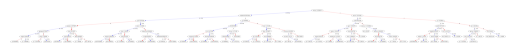

In [79]:
import xgboost as xgb
from matplotlib import pyplot as plt
import graphviz

plt.figure(figsize=(20, 20))

xgb.plot_tree(xgb_model, num_trees=0)
plt.show()


#SHAP, который не работает, потому что не хватает ОЗУ в колабе либо у него бесконечная работа

In [54]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 19.5 MB/s eta 0:00:00


In [55]:
import shap
import matplotlib.pyplot as plt
import numpy as np

In [57]:
subset_size = 10
X_test_combined_subset = X_test_combined[:subset_size].toarray()
y_test_subset = y_test[:subset_size]

X_train_combined_subset = X_train_combined[:subset_size].toarray()

explainer_rf = shap.KernelExplainer(rf_model_combined.predict, X_train_combined_subset)
shap_values_rf = explainer_rf.shap_values(X_test_combined_subset, nsamples=100)

explainer_xgb = shap.KernelExplainer(xgb.predict, X_train_combined_subset)
shap_values_xgb = explainer_xgb.shap_values(X_test_combined_subset, nsamples=100)

shap.summary_plot(shap_values_rf, X_test_combined_subset, max_display=20, plot_type="bar")
plt.title("Random Forest - Top 20 Important Features")
plt.show()

shap.summary_plot(shap_values_xgb, X_test_combined_subset, max_display=20, plot_type="bar")
plt.title("XGBoost - Top 20 Important Features")
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 